In [ ]:
import pandas as pd

In [ ]:
#Abrindo arquivo
tabela = pd.read_excel('DadosStackExchange.xlsx')
tabela.head()

,tags__001,tags__002,tags__003,tags__004,tags__005,owner__reputation,owner__user_id,owner__user_type,owner__accept_rate,owner__profile_image,owner__display_name,owner__link,is_answered,view_count,closed_date,protected_date,accepted_answer_id,answer_count,score,last_activity_date,creation_date,last_edit_date,question_id,link,closed_reason,title
0,docker,containers,virtual-machine,virtualization,NaN,41102.0,109549.0,registered,95.0,https://www.gravatar.com/avatar/7d9c3b5cc4495a...,zslayton,https://stackoverflow.com/users/109549/zslayton,True,706987,NaN,1.409785e+09,16048358.0,19,3570,1574288579,1366147187,1.535487e+09,16047306,https://stackoverflow.com/questions/16047306/h...,NaN,How is Docker different from a virtual machine?
1,docker,containers,NaN,NaN,NaN,50998.0,1203556.0,registered,57.0,https://www.gravatar.com/avatar/aca772bc8ed79a...,Tampa,https://stackoverflow.com/users/1203556/tampa,True,159252,NaN,1.532954e+09,28997256.0,11,276,1558130938,1426106421,1.500999e+09,28996907,https://stackoverflow.com/questions/28996907/d...,NaN,docker: &quot;build&quot; requires 1 argument....
2,docker,cron,containers,sh,NaN,2303.0,6268839.0,registered,NaN,https://www.gravatar.com/avatar/4636cdaf8d2d4f...,C Heyer,https://stackoverflow.com/users/6268839/c-heyer,True,228263,NaN,NaN,37458519.0,16,230,1576772918,1464258773,1.464273e+09,37458287,https://stackoverflow.com/questions/37458287/h...,NaN,How to run a cron job inside a docker container?
3,http,orchestration,hypermedia,microservices,NaN,19369.0,317384.0,registered,62.0,https://www.gravatar.com/avatar/be674120f51c26...,Roger Johansson,https://stackoverflow.com/users/317384/roger-j...,True,63397,NaN,1.540551e+09,30441546.0,7,188,1575642834,1426668776,1.490831e+09,29117570,https://stackoverflow.com/questions/29117570/o...,NaN,Orchestrating microservices
4,kubernetes,containers,kubernetes-service,NaN,NaN,2173.0,4350060.0,registered,100.0,https://www.gravatar.com/avatar/eaf98bd3f2828c...,AmazingBergkamp,https://stackoverflow.com/users/4350060/amazin...,True,74310,NaN,NaN,41510604.0,5,186,1548295302,1483718530,1.536526e+09,41509439,https://stackoverflow.com/questions/41509439/w...,NaN,"What&#39;s the difference between ClusterIP, N..."


In [ ]:
tags = tabela.loc[:, [
  'tags__001',
  'tags__002',
  'tags__003',
  'tags__004',
  'tags__005'
]]
tags.head()


,tags__001,tags__002,tags__003,tags__004,tags__005
0,docker,containers,virtual-machine,virtualization,NaN
1,docker,containers,NaN,NaN,NaN
2,docker,cron,containers,sh,NaN
3,http,orchestration,hypermedia,microservices,NaN
4,kubernetes,containers,kubernetes-service,NaN,NaN


In [ ]:
# Contagem de valores por coluna
tags_contagem = pd.DataFrame()

for coluna in tags:
    contagem = tags[coluna].value_counts()
    dfContagem = pd.DataFrame(contagem)
    tags_contagem = tags_contagem.combine_first(dfContagem)

# Remover NaN
tags_contagem = tags_contagem.fillna(0)
tags_contagem

,tags__001,tags__002,tags__003,tags__004,tags__005
.net,26.0,23.0,1.0,0.0,0.0
.net-core,6.0,3.0,13.0,0.0,0.0
12factor,1.0,0.0,1.0,1.0,1.0
2phase-commit,0.0,0.0,0.0,1.0,0.0
960.gs,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
zeit-now,0.0,0.0,1.0,0.0,0.0
zend-framework2,0.0,0.0,1.0,0.0,0.0
zeromq,0.0,1.0,0.0,0.0,0.0
zipkin,0.0,0.0,1.0,2.0,0.0


In [ ]:
# Contagem total
tags_contagem.loc[:,'Total'] = tags_contagem.sum(axis=1)
tags_contagem

,tags__001,tags__002,tags__003,tags__004,tags__005,Total
.net,26.0,23.0,1.0,0.0,0.0,100.0
.net-core,6.0,3.0,13.0,0.0,0.0,44.0
12factor,1.0,0.0,1.0,1.0,1.0,8.0
2phase-commit,0.0,0.0,0.0,1.0,0.0,2.0
960.gs,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...
zeit-now,0.0,0.0,1.0,0.0,0.0,2.0
zend-framework2,0.0,0.0,1.0,0.0,0.0,2.0
zeromq,0.0,1.0,0.0,0.0,0.0,2.0
zipkin,0.0,0.0,1.0,2.0,0.0,6.0


In [ ]:
# Ordenar 
contagem_ordenada = tags_contagem.sort_values(by=['Total'],ascending = False)
contagem_ordenada

,tags__001,tags__002,tags__003,tags__004,tags__005,Total
containers,109.0,687.0,1105.0,806.0,287.0,5988.0
microservices,210.0,526.0,594.0,466.0,215.0,4022.0
docker,557.0,353.0,113.0,26.0,0.0,2098.0
c++,912.0,7.0,1.0,0.0,0.0,1840.0
java,479.0,2.0,0.0,0.0,0.0,962.0
...,...,...,...,...,...,...
divide,0.0,0.0,0.0,0.0,1.0,2.0
django-admin,0.0,0.0,1.0,0.0,0.0,2.0
django-apps,0.0,0.0,0.0,0.0,1.0,2.0
django-celery,0.0,0.0,0.0,0.0,1.0,2.0


In [ ]:
contagem_ordenada_index = contagem_ordenada.reset_index()
contagem_ordenada_index

,index,tags__001,tags__002,tags__003,tags__004,tags__005,Total
0,containers,109.0,687.0,1105.0,806.0,287.0,5988.0
1,microservices,210.0,526.0,594.0,466.0,215.0,4022.0
2,docker,557.0,353.0,113.0,26.0,0.0,2098.0
3,c++,912.0,7.0,1.0,0.0,0.0,1840.0
4,java,479.0,2.0,0.0,0.0,0.0,962.0
...,...,...,...,...,...,...,...
2323,divide,0.0,0.0,0.0,0.0,1.0,2.0
2324,django-admin,0.0,0.0,1.0,0.0,0.0,2.0
2325,django-apps,0.0,0.0,0.0,0.0,1.0,2.0
2326,django-celery,0.0,0.0,0.0,0.0,1.0,2.0


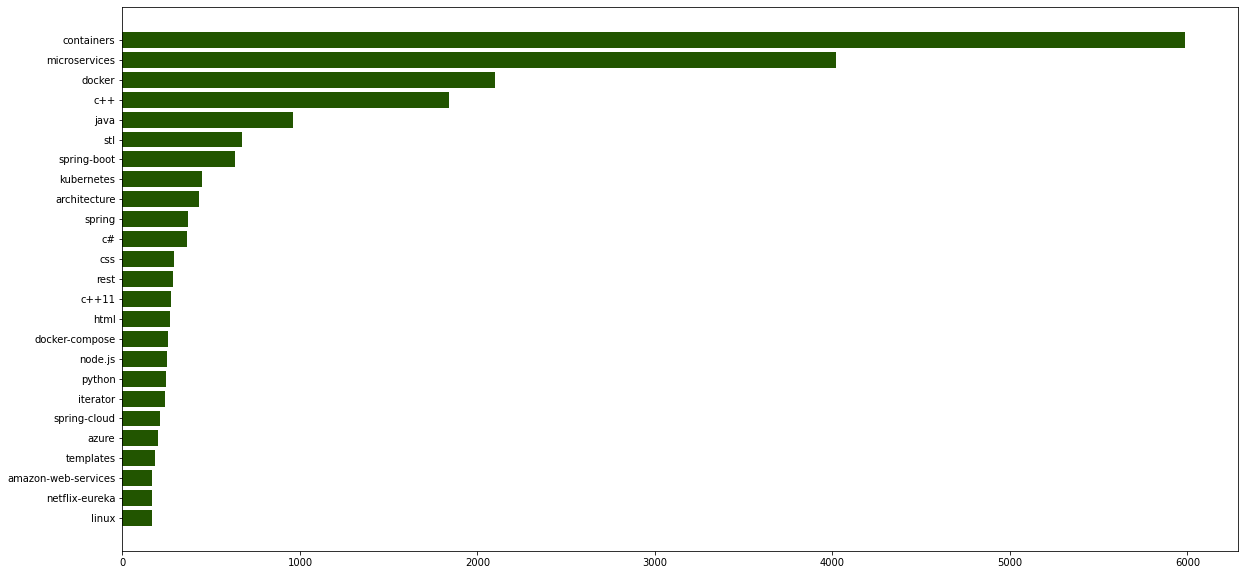

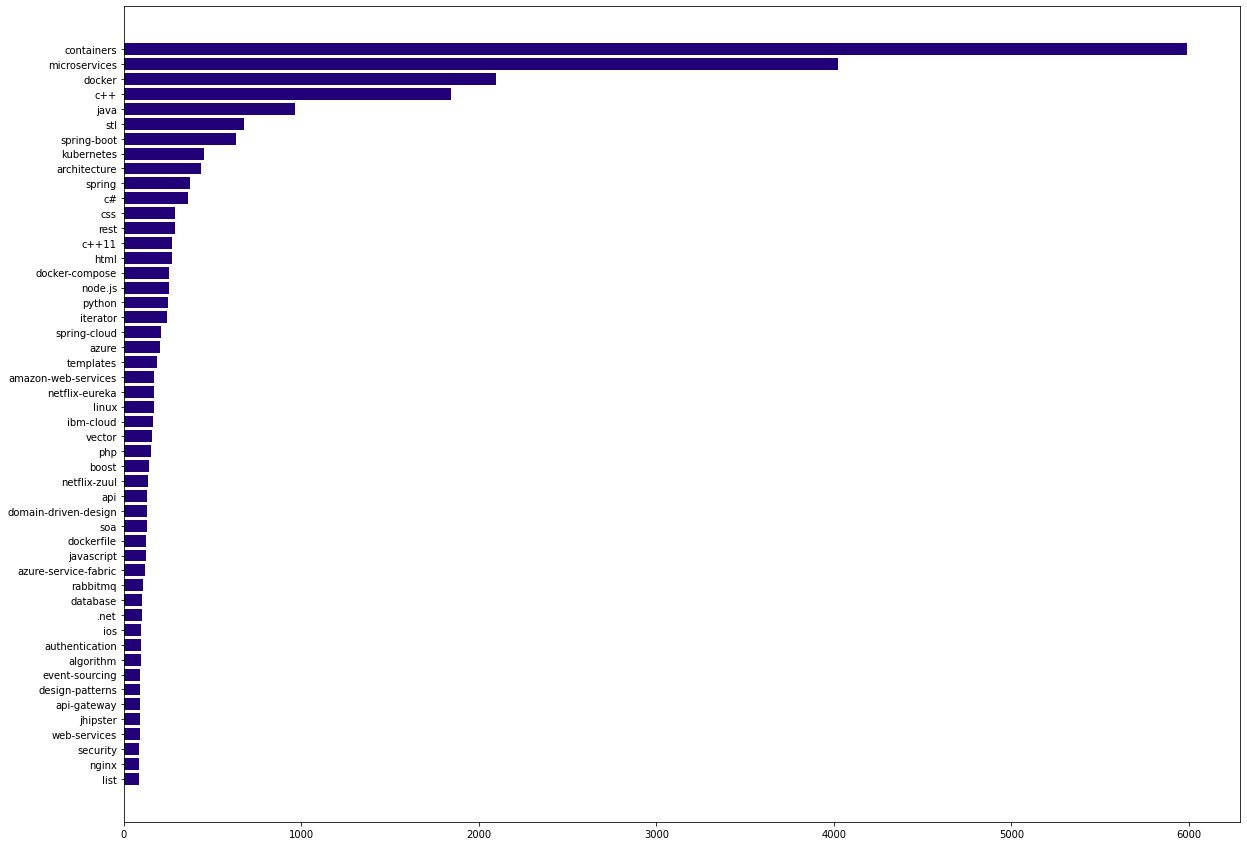

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

maiores25 = contagem_ordenada_index.head(25).sort_values(by=['Total'])
maiores50 = contagem_ordenada_index.head(50).sort_values(by=['Total'])

plt.figure(figsize=(20, 10))
barra25 = plt.barh(maiores25['index'], maiores25['Total'], color = '#225500')
plt.savefig('barra25.png')

plt.figure(figsize=(20, 15))
barra50 = plt.barh(maiores50['index'], maiores50['Total'], color = '#220077')
plt.savefig('barra50.png')

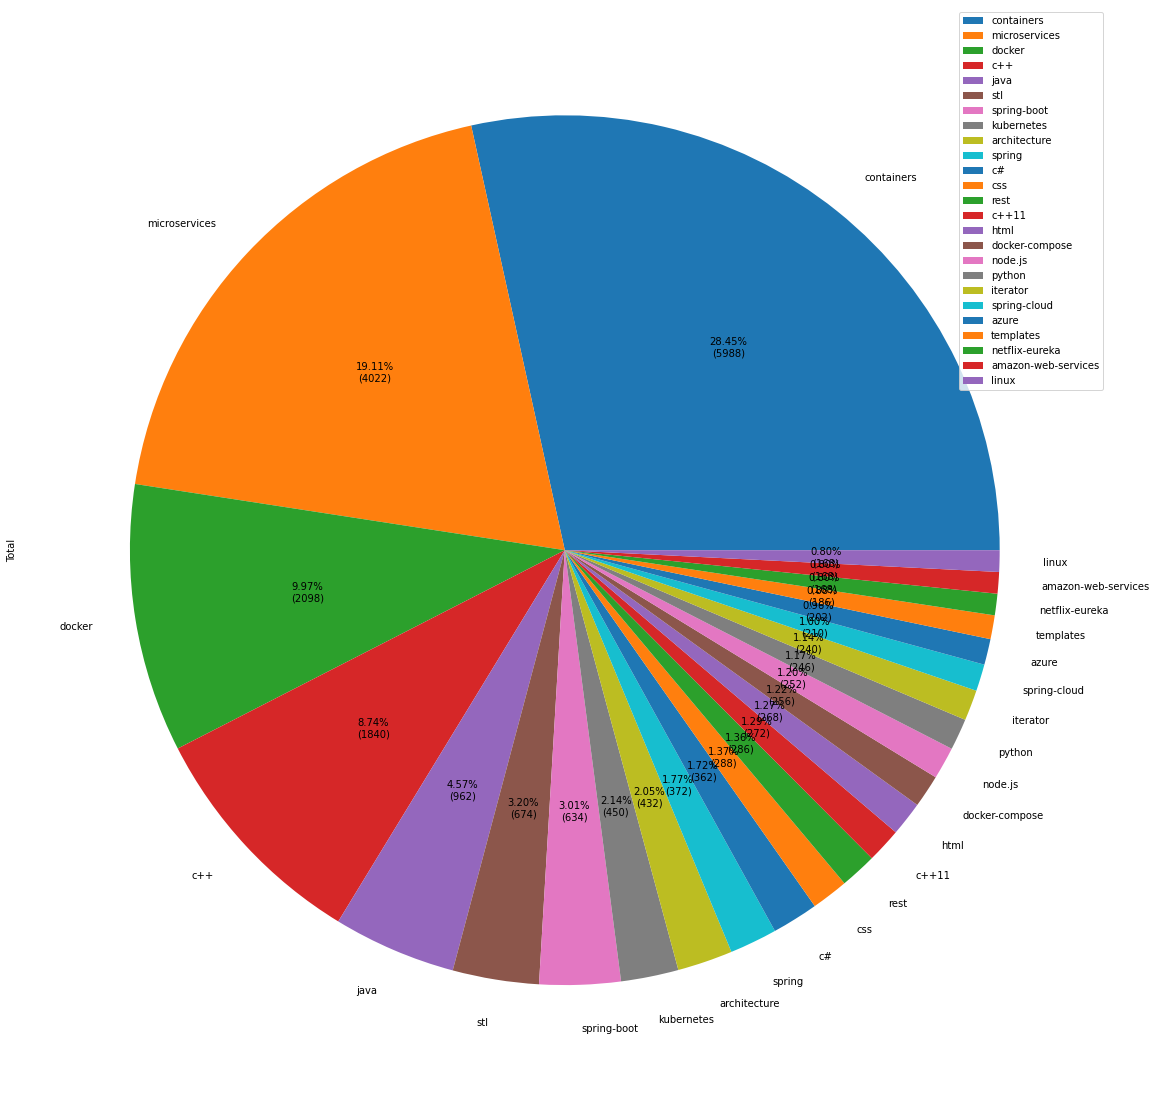

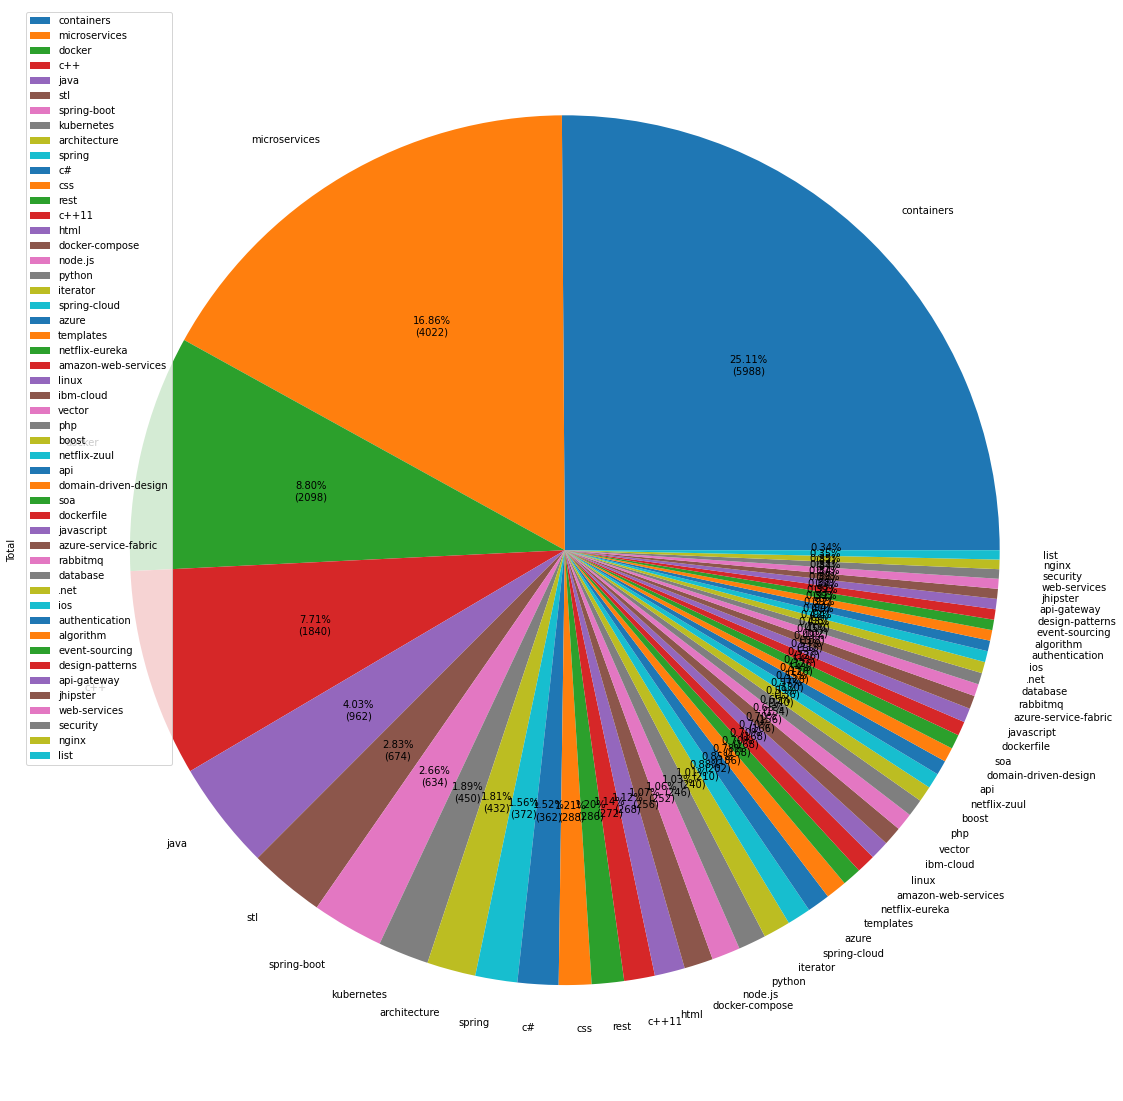

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p = pct,v = val)
    return my_autopct

c_ordenada25 = contagem_ordenada.head(25)
c_ordenada50 = contagem_ordenada.head(50)

pizza25 = c_ordenada25.plot.pie(y='Total', figsize=(20, 20), autopct=make_autopct(c_ordenada25['Total']))
pizza25.get_figure().savefig("pizza25.png")
pizza50 = c_ordenada50.plot.pie(y='Total', figsize=(20, 20), autopct=make_autopct(c_ordenada50['Total']))
pizza50.get_figure().savefig("pizza50.png")

In [ ]:
from google.colab import files
files.download('barra25.png') 
files.download('barra50.png') 
files.download('pizza25.png') 
files.download('pizza50.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

!pip install --upgrade apyori



  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=08f37d8b800b7c51d273708798d18964000f8e9ae1d56f8bcf7a7d639d7a0983
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

colunas = list(tags)

# Criar array com lista de tags em cada linha do dataframe
tags_list = []
for linha in tags.itertuples(index=False):
  linha_list = []

  # Se valor não for nan adicionar a linha
  for i in range(len(colunas)):
    if str(linha[i]) != 'nan':
      linha_list.append(linha[i])

  tags_list.append(linha_list)

# Transformar para onehot
te = TransactionEncoder()
onehot = te.fit(tags_list).transform(tags_list)
pd_onehot = pd.DataFrame(onehot, columns=te.columns_)

In [ ]:
pd_onehot.head()

,.net,.net-core,12factor,2phase-commit,960.gs,a-star,aac,ab-testing,absinthe,absolute,abstract,abstract-class,abstraction,acceptance-testing,access,access-control,access-token,account,accumulate,acid,acl,actionlistener,actionscript,actionscript-3,active-directory,activemq-artemis,activex,activiti,actor,ada,adapter,add,adobe,aem,aerospike,agent,agents-jade,aggregate,aggregateroot,aggregation,...,woocommerce,word-wrap,wordpress,workbench,workflow,workflow-foundation,worklight-server,workload-scheduler,workmanagertaskexecutor,workspace,wpf,wrapper,wso2,wso2-mgw,wso2carbon,wso2is,wwdc,x++,x11-forwarding,xamarin,xcode,xcode4.5,xdebug,xml,xml-rpc,xsd,xserver,xunit,yaml,yarn,yocto,youtube,yui,yum,zef,zeit-now,zend-framework2,zeromq,zipkin,zuul-testing
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori

#support -> Apoio,suporte
#itemsets -> Conjunto de itens
#apriori(pd_onehot,  min_support=0.1,  use_colnames=True)

frequent_itemsets = apriori(pd_onehot,  min_support=0.01,  use_colnames=True)

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ frequent_itemsets['itemsets'] == {'microservices', 'containers'} ]
frequent_itemsets

,support,itemsets,length
0,0.0100,(.net),1
1,0.0168,(amazon-web-services),1
2,0.0130,(api),1
3,0.0432,(architecture),1
4,0.0202,(azure),1
...,...,...,...
99,0.0166,"(containers, docker, kubernetes)",3
100,0.0132,"(containers, linux, docker)",3
101,0.0146,"(java, spring, microservices)",3
102,0.0240,"(spring-boot, java, microservices)",3


In [ ]:
frequent_itemsets.head(60)

,support,itemsets,length
0,0.0100,(.net),1
1,0.0168,(amazon-web-services),1
2,0.0130,(api),1
3,0.0432,(architecture),1
4,0.0202,(azure),1
5,0.0118,(azure-service-fabric),1
6,0.0140,(boost),1
7,0.0362,(c#),1
8,0.1840,(c++),1
9,0.0272,(c++11),1


In [ ]:
frequent_itemsets.tail(60)

,support,itemsets,length
44,0.0138,"(containers, boost)",2
45,0.0198,"(containers, c#)",2
46,0.0164,"(microservices, c#)",2
47,0.0250,"(c++, c++11)",2
48,0.1826,"(containers, c++)",2
49,0.0222,"(iterator, c++)",2
50,0.0650,"(c++, stl)",2
51,0.0180,"(templates, c++)",2
52,0.0150,"(c++, vector)",2
53,0.0266,"(containers, c++11)",2


# Nova seção